<a href="https://colab.research.google.com/github/SriNihitha12/BigdataProject/blob/main/Traffic_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Linear Regression**

### What it is:
A simple, classic machine learning model that predicts a continuous output (like traffic volume) based on a straight-line relationship between input features and output.

### How it works:
It finds the best-fitting line through the data points by minimizing the error between predicted and actual values using Least Squares.

### Why used here:
To quickly build a simple traffic volume predictor using basic features (hour, weekday, month).


In [1]:
# STEP 1: Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# STEP 2: Install necessary Python libraries
!pip install pandas matplotlib scikit-learn

In [3]:
# STEP 3: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# STEP 4: Define the path to the dataset file in Google Drive
data_path = '/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv' # Make sure to uplaod your dataset to the path that you are using.

In [5]:
# STEP 5: Load the traffic dataset using pandas
df = pd.read_csv(data_path)

In [6]:
# STEP 6: Display first few rows (for checking structure)
df.head()

,station_id,dir_of_travel,lane_of_travel,date,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,24
0,26,1,1,2024-01-01,71,57,40,37,59,54,...,593,571,556,459,388,328,230,165,122,97
1,26,1,2,2024-01-01,11,5,3,2,4,4,...,317,336,281,247,164,91,63,53,14,18
2,26,5,1,2024-01-01,116,57,39,35,49,72,...,602,571,414,380,288,240,187,122,95,59
3,26,5,2,2024-01-01,19,2,7,3,4,9,...,382,302,189,135,102,69,50,30,13,6
4,26,1,1,2024-01-02,72,72,54,93,116,196,...,476,437,468,377,297,247,188,191,140,124


In [7]:
# STEP 7: Remove any fully empty rows
df.dropna(how='all', inplace=True)

In [8]:
# STEP 8: Optional - Print column names to verify hour columns exist
print(df.columns)

Index(['station_id', 'dir_of_travel', 'lane_of_travel', 'date', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')


In [9]:
# STEP 9: Reshape wide format (1–24 hours) into long format using melt
hourly_df = df.melt(
    id_vars=['station_id', 'dir_of_travel', 'lane_of_travel', 'date'],
    value_vars=[str(i) for i in range(1, 25)],
    var_name='hour',
    value_name='volume'
)

In [10]:
# STEP 10: Combine date and hour to create a full datetime column
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')

In [11]:
# STEP 11: Sort data by datetime and reset the index
hourly_df.sort_values('datetime', inplace=True)
hourly_df.reset_index(drop=True, inplace=True)

In [12]:
# STEP 12: Drop rows where volume is missing
hourly_df = hourly_df[hourly_df['volume'].notnull()]

In [13]:
# STEP 13: Show structure of cleaned data
hourly_df.head()

,station_id,dir_of_travel,lane_of_travel,date,hour,volume,datetime
0,11280,1,2,2020-01-01,1,302,2020-01-01
1,220,5,1,2020-01-01,1,4,2020-01-01
2,405,1,1,2020-01-01,1,632,2020-01-01
3,11464,1,3,2020-01-01,1,22,2020-01-01
4,4741,1,1,2020-01-01,1,91,2020-01-01


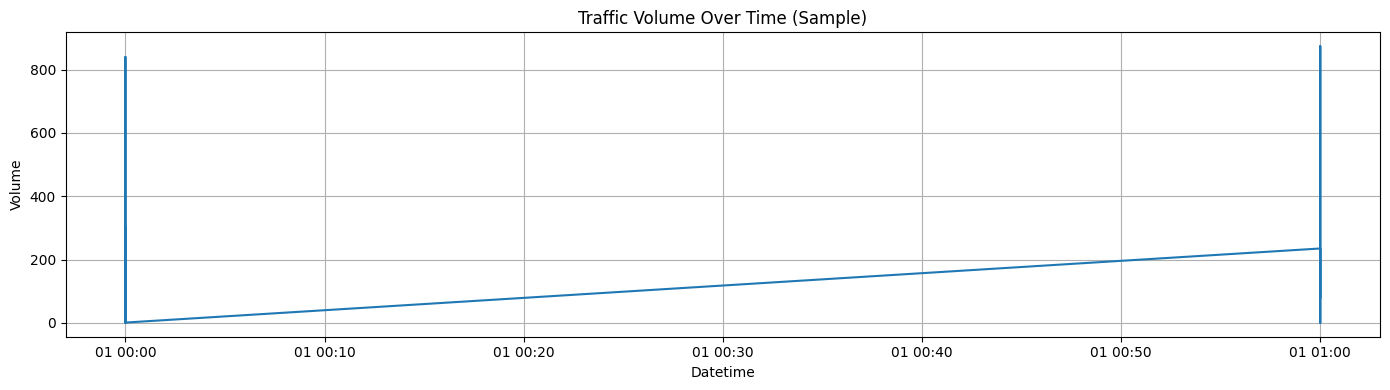

In [14]:
# STEP 14: Plot a sample of traffic volume over time
plt.figure(figsize=(14, 4))
plt.plot(hourly_df['datetime'][:500], hourly_df['volume'][:500])
plt.title("Traffic Volume Over Time (Sample)")
plt.xlabel("Datetime")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# STEP 15: Extract time-related features: hour, weekday, and month
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday
hourly_df['month'] = hourly_df['datetime'].dt.month

In [16]:
# STEP 16: Prepare input features and target variable
features = hourly_df[['hour', 'weekday', 'month']]
target = hourly_df['volume']

In [17]:
# STEP 17: Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
# STEP 18: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# STEP 19: Use the trained model to predict on the test data
y_pred = model.predict(X_test)

In [20]:
# STEP 20: Calculate and print evaluation metrics: MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("LinearRegression RMSE:", rmse)

Mean Squared Error: 174155.30187245598
LinearRegression RMSE: 417.31918464462666


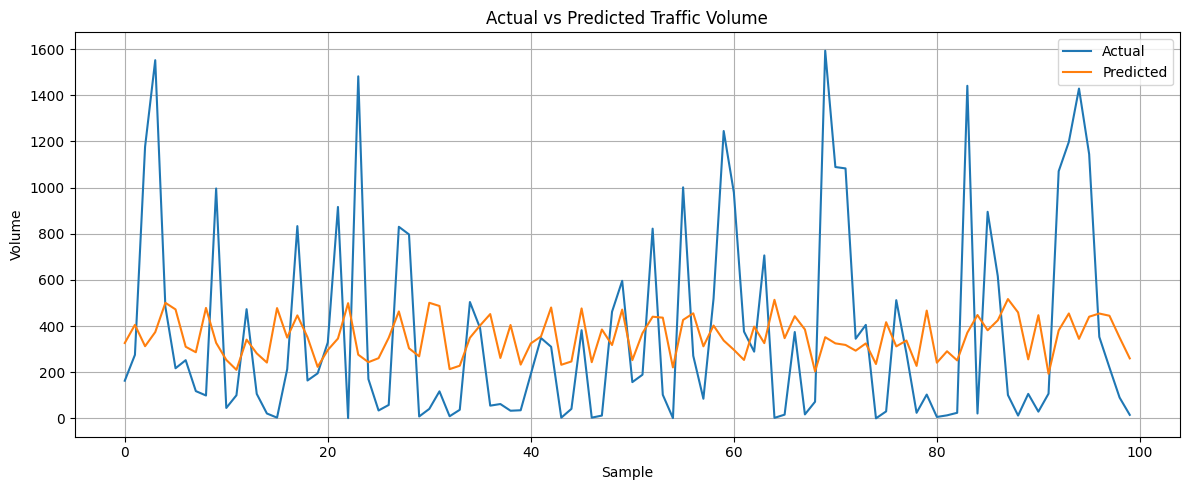

In [21]:
# STEP 21: Plot a comparison of actual vs predicted traffic volumes (sample 100)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Sample")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. XGBoost (Extreme Gradient Boosting)

### What it is:
A powerful boosting algorithm that builds a series of decision trees, each correcting the previous one's errors.

### How it works:
It sequentially improves trees using gradient descent to minimize loss.

### Why used here:
To achieve high accuracy on large, complex traffic datasets efficiently.

In [22]:
#XGBoost
# Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# STEP1. Install XGBoost
!pip install xgboost

In [58]:
# STEP2. Import necessary libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

In [59]:
# STEP3. Create and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
# STEP4. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [30]:
# STEP5. Evaluate the model using RMSE
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
# Print RMSE
print(" XGBoost RMSE:", xgb_rmse)

 XGBoost RMSE: 363.6950130260243


In [31]:
# STEP 6: Create a pivot table for heatmap visualization (Predicted volume)
predicted_pivot = pd.DataFrame(y_pred, columns=['Predicted'], index=X_test.index)
predicted_pivot['hour'] = X_test['hour']
predicted_pivot['weekday'] = X_test['weekday']
predicted_pivot = predicted_pivot.pivot_table(values='Predicted', index='hour', columns='weekday', aggfunc='mean')

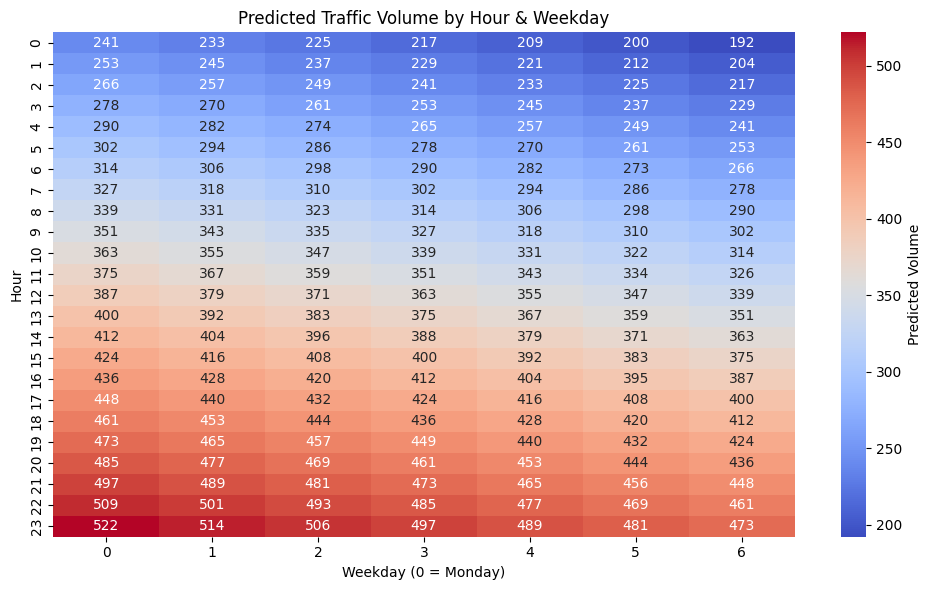

In [61]:
#STEP 7: Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(predicted_pivot, cmap='coolwarm', annot=True, fmt='.0f', cbar_kws={'label': 'Predicted Volume'})
plt.title("Predicted Traffic Volume by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

# 3. Decision Tree Regressor

### What it is:
A simple tree structure that splits data based on feature values to make predictions.

### How it works:
It asks a series of questions at nodes and assigns a value at leaves based on data splits.

### Why used here:
To easily visualize and understand how time features affect traffic volume.

In [51]:
# STEP 1: Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# STEP 2: Install required libraries
!pip install pandas matplotlib seaborn scikit-learn

In [53]:
# STEP 3: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:
# STEP 4: Load Dataset
data_path = '/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv'  # Update if needed
df = pd.read_csv(data_path)
df.dropna(how='all', inplace=True)

In [55]:
# STEP 5: Convert wide format (1-24 hours) to long format
hourly_df = df.melt(
    id_vars=['station_id', 'dir_of_travel', 'lane_of_travel', 'date'],
    value_vars=[str(i) for i in range(1, 25)],
    var_name='hour',
    value_name='volume'
)

In [62]:
# STEP 6: Generate datetime and extract features
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')
hourly_df.dropna(subset=['volume'], inplace=True)
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday
hourly_df['month'] = hourly_df['datetime'].dt.month

In [63]:
# STEP 7: Prepare input features and target
features = hourly_df[['hour', 'weekday', 'month']]
target = hourly_df['volume']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [64]:
# STEP 8: Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
# STEP 9: Predict and Evaluate
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print("RMSE (Decision Tree Regressor):", rmse_dt)

RMSE (Decision Tree Regressor): 363.48427900104355


In [66]:
# STEP 10: Create pivot table for heatmap
dt_heatmap_df = X_test.copy()
dt_heatmap_df['Predicted'] = y_pred_dt
dt_pivot = dt_heatmap_df.pivot_table(
    values='Predicted',
    index='hour',
    columns='weekday',
    aggfunc='mean'
)

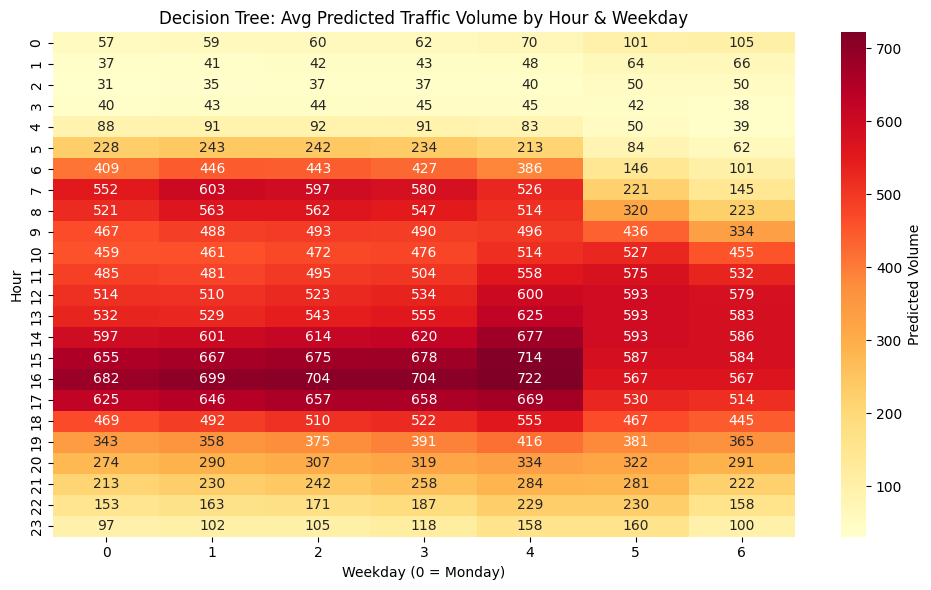

In [67]:
# STEP 11: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dt_pivot, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Predicted Volume'})
plt.title("Decision Tree: Avg Predicted Traffic Volume by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

# 4. Prophet

### What it is:
A time-series forecasting tool developed by Facebook, best for capturing trends and seasonality.

### How it works:
It automatically models trend, yearly, weekly seasonality, and holiday effects.

### Why used here:
To predict future traffic patterns based on strong daily and weekly cycles.

In [68]:
# Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# STEP 1: Install Prophet
!pip install prophet --quiet

In [70]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [71]:
# STEP 3: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv')
df.dropna(how='all', inplace=True)

In [72]:
# STEP 4: Convert Wide to Long
hourly_df = df.melt(
    id_vars=['station_id', 'dir_of_travel', 'lane_of_travel', 'date'],
    value_vars=[str(i) for i in range(1, 25)],
    var_name='hour',
    value_name='volume'
)

In [73]:
# STEP 5: Create Datetime Column
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')
hourly_df.dropna(subset=['volume'], inplace=True)

# Extract hour and weekday for later heatmap classification
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday

In [74]:
# STEP 6: Prepare Data for Prophet
prophet_df = hourly_df[['datetime', 'volume']].rename(columns={'datetime': 'ds', 'volume': 'y'})
prophet_df = prophet_df.groupby('ds').mean().reset_index()

In [75]:
# STEP 7: Fit the Prophet Model
model = Prophet()
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvh6qpse/ioda3001.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwvh6qpse/2s_3gspp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91486', 'data', 'file=/tmp/tmpwvh6qpse/ioda3001.json', 'init=/tmp/tmpwvh6qpse/2s_3gspp.json', 'output', 'file=/tmp/tmpwvh6qpse/prophet_modelvd400px0/prophet_model-20250427005730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:58:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
# STEP 8: Forecast Future (48 hours)
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


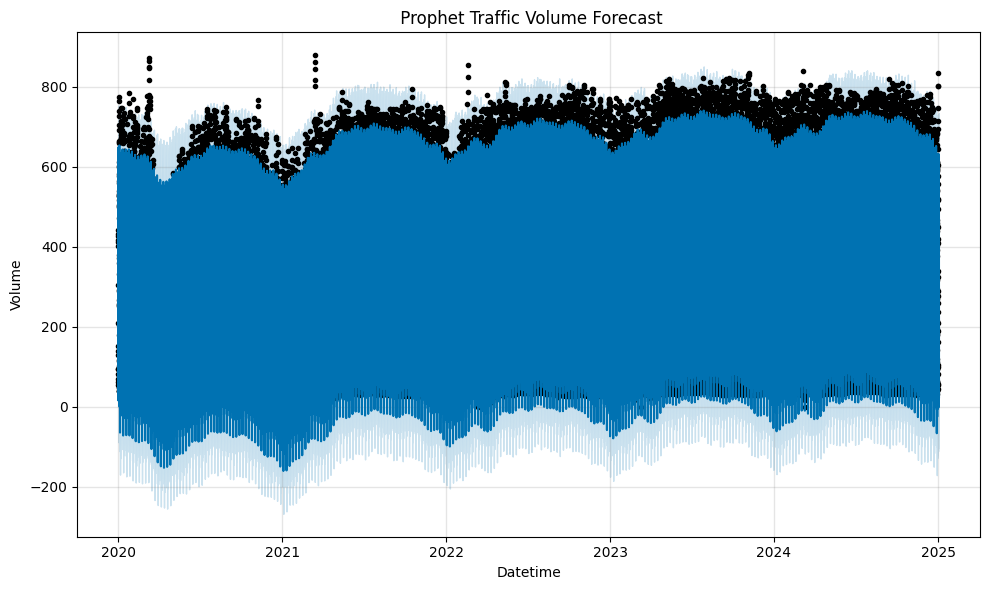

In [77]:
# STEP 9: Plot Forecast
model.plot(forecast)
plt.title(" Prophet Traffic Volume Forecast")
plt.xlabel("Datetime")
plt.ylabel("Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

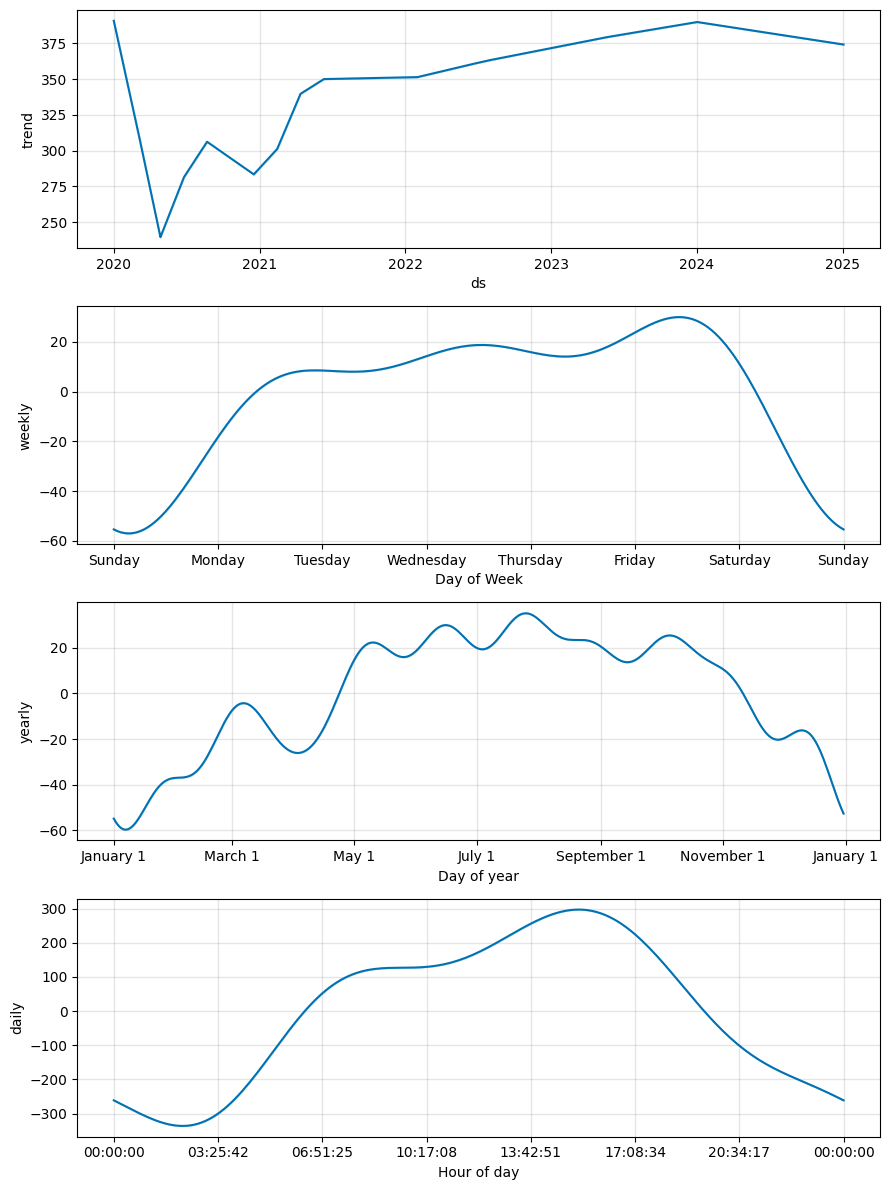

In [78]:
# Optional: Forecast Components
model.plot_components(forecast)
plt.tight_layout()
plt.show()

In [79]:
# STEP 10: Calculate RMSE
actual = prophet_df['y'].values
predicted = model.predict(prophet_df)['yhat'].values
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(" Prophet RMSE:", rmse)

 Prophet RMSE: 80.57827892806492


In [80]:
# STEP 11: Merge back predictions to add hour and weekday
forecast_trimmed = forecast[['ds', 'yhat']].copy()
forecast_trimmed['hour'] = forecast_trimmed['ds'].dt.hour
forecast_trimmed['weekday'] = forecast_trimmed['ds'].dt.weekday

In [81]:
# STEP 12: Classify Volume Levels
def classify_traffic(v):
    if v < 250:
        return 'Low'
    elif v < 500:
        return 'Medium'
    else:
        return 'High'

forecast_trimmed['Traffic_Level'] = forecast_trimmed['yhat'].apply(classify_traffic)

In [82]:
# STEP 13: Pivot Table for Heatmap
pivot = forecast_trimmed.pivot_table(
    values='Traffic_Level',
    index='hour',
    columns='weekday',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Low'
)

In [83]:
# STEP 14: Convert Categories to Numeric for Plotting
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_numeric = pivot.replace(traffic_map)

# Color map for 'Low', 'Medium', 'High'
color_map = {'Low': '#9be7ff', 'Medium': '#ffc857', 'High': '#ff5c5c'}
custom_cmap = ListedColormap([color_map['Low'], color_map['Medium'], color_map['High']])

<ipython-input-83-ad99c25cc83c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_numeric = pivot.replace(traffic_map)


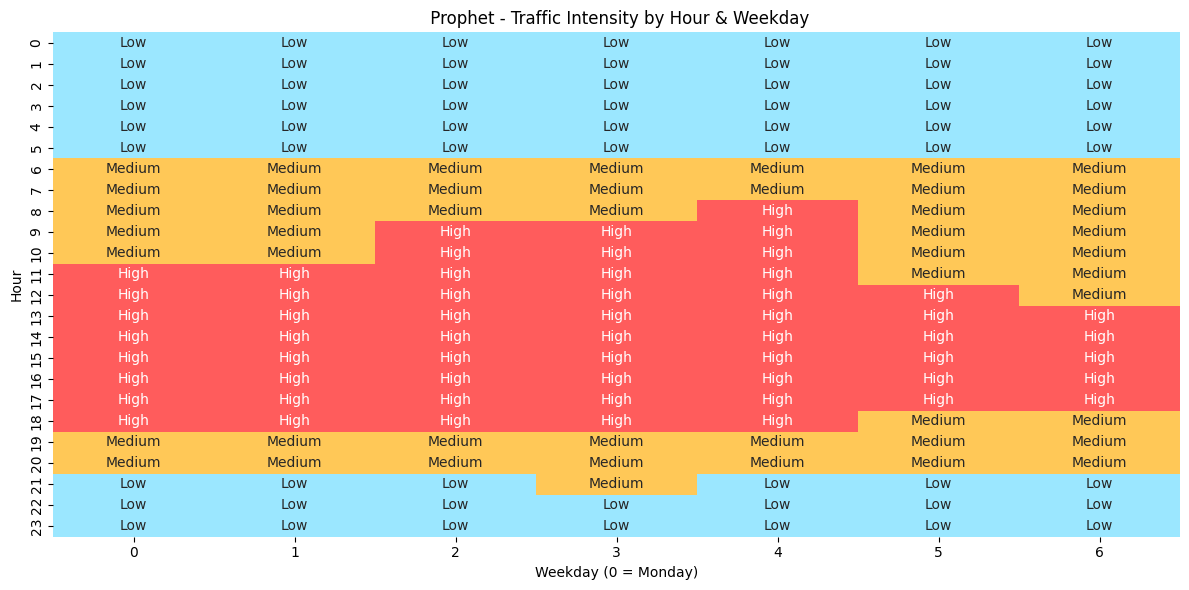

In [84]:
# STEP 15: Plot Classification Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_numeric,
    cmap=custom_cmap,
    annot=pivot,
    fmt='',
    cbar=False
)
plt.title(" Prophet - Traffic Intensity by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

# 5. Random Forest

### What it is:
An ensemble method that builds multiple decision trees and averages their results to make a final prediction.

### How it works:
Each tree is trained on a random sample of the data. By combining the outputs of many trees, it reduces overfitting and improves accuracy.

### Why used here:
To model complex relationships between time features (hour, weekday, month) and traffic volume with strong generalization.

In [85]:
# STEP 1: Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Step 2: Install libraries
!pip install pandas openpyxl

In [87]:
# Step 3: Import Random Forest Regressor from sklearn
from sklearn.ensemble import RandomForestRegressor

In [88]:
# Step 4: Create a Random Forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [90]:
# Step 5: Train the model using training data (The runtime for this step will take around 50 mins to 1 hour)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
# Step 6: Predict traffic volume using the test data
y_pred_rf = rf.predict(X_test)

In [92]:
# Step 7: Evaluate and print RMSE for Random Forest model
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

RMSE (Random Forest): 363.48410058490055


In [93]:
# Step 8: Create a pivot table to calculate average actual traffic volume by hour and weekday
pivot = hourly_df.pivot_table(values='volume', index='hour', columns='weekday', aggfunc='mean')

Text(0.5, 1.0, 'Average Traffic Volume by Hour & Weekday')

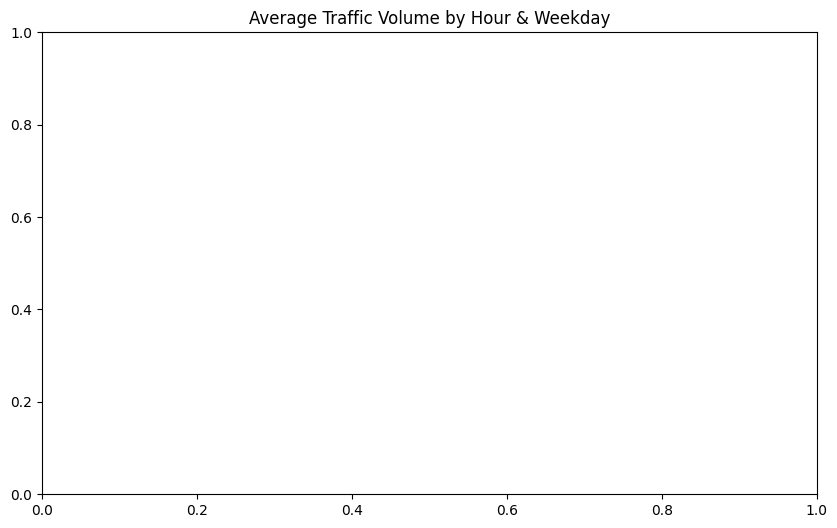

In [94]:
# Step 9: Set up the heatmap figure
plt.figure(figsize=(10, 6))
plt.title("Average Traffic Volume by Hour & Weekday")

<Axes: xlabel='weekday', ylabel='hour'>

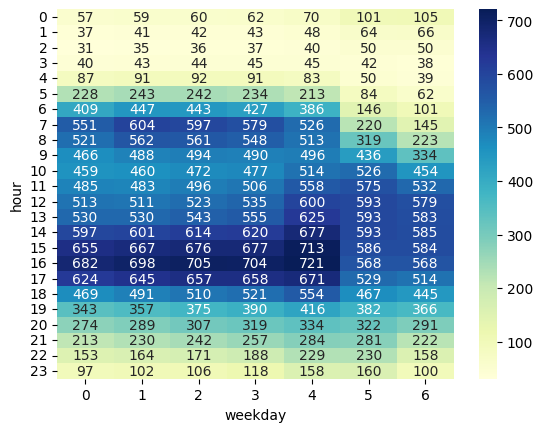

In [95]:
# Step 10: Import seaborn and create the heatmap
import seaborn as sns
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')

Text(0, 0.5, 'Hour')

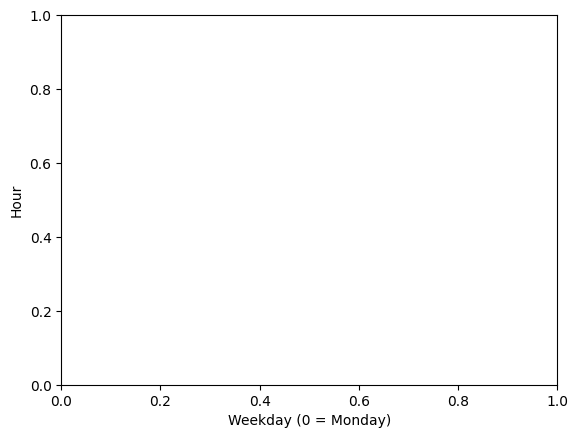

In [96]:
# Step 11: Label the axes
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")

In [99]:
# Step 12: Display the plot
plt.show()

# 6. CatBoost

### What it is:
A machine learning model similar to XGBoost, but especially good at handling categorical data (like weekday, hour) automatically.

### How it works:
It builds boosting trees like XGBoost but internally treats categorical variables without needing manual conversion (encoding).

### Why used here:
To accurately predict traffic volume using time-based categorical features like weekday without heavy preprocessing.

In [100]:
# Mount Google Drive to access your dataset
#(If you've already run the code in any other models; no need to run this step again, but if you haven't run any models before; you've to run starting from this step.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# STEP 1: Install CatBoost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 12.2 MB/s eta 0:00:00


In [102]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

In [103]:
# STEP 3: Load Dataset
data_path = '/content/drive/MyDrive/TrafficData/Minnesota_TrafficData_2020-24.csv'  # Update your path if needed
df = pd.read_csv(data_path)
df.dropna(how='all', inplace=True)

In [104]:
# STEP 4: Convert wide format to long format
id_vars = ['station_id', 'dir_of_travel', 'lane_of_travel', 'date']
value_vars = [str(i) for i in range(1, 25)]  # columns '1' to '24'

hourly_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars,
                    var_name='hour', value_name='volume')

In [105]:
# STEP 5: Extract datetime features
hourly_df['datetime'] = pd.to_datetime(hourly_df['date']) + pd.to_timedelta(hourly_df['hour'].astype(int) - 1, unit='h')
hourly_df['hour'] = hourly_df['datetime'].dt.hour
hourly_df['weekday'] = hourly_df['datetime'].dt.weekday
hourly_df['month'] = hourly_df['datetime'].dt.month
hourly_df.dropna(subset=['volume'], inplace=True)

In [106]:
# STEP 6: Prepare Features
features = hourly_df[['hour', 'weekday', 'month']]
target = hourly_df['volume']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [107]:
# STEP 7: Train CatBoost Regressor (The runtime for this step will take around 50 mins to 1 hour)
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)

In [108]:
# STEP 8: Predict and Evaluate
y_pred = cat_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(" CatBoost RMSE:", rmse)

 CatBoost RMSE: 363.472906937069


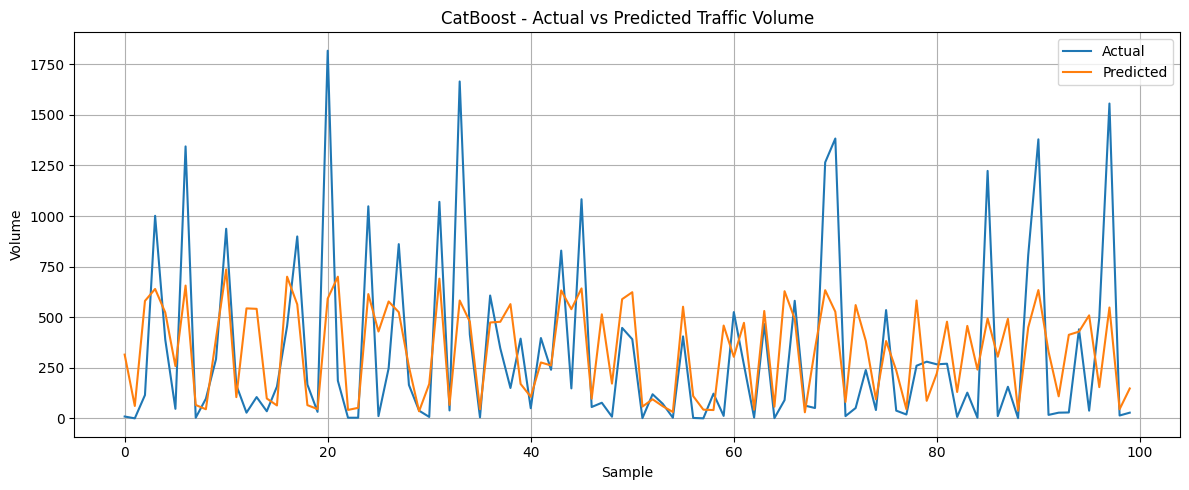

In [109]:
# STEP 9: Prediction Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("CatBoost - Actual vs Predicted Traffic Volume")
plt.xlabel("Sample")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [110]:
# STEP 10: Create heatmap classification DataFrame
heatmap_df = pd.DataFrame({
    'Predicted': y_pred,
    'hour': X_test['hour'].values,
    'weekday': X_test['weekday'].values
})

In [111]:
# STEP 11: Classify traffic levels
def classify_traffic(volume):
    if volume < 300:
        return 'Low'
    elif volume < 700:
        return 'Medium'
    else:
        return 'High'

heatmap_df['Traffic_Level'] = heatmap_df['Predicted'].apply(classify_traffic)

In [112]:
# Step 12: Create pivot table for heatmap
pivot_class = heatmap_df.pivot_table(
    values='Traffic_Level',
    index='hour',
    columns='weekday',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else 'Low'
)

In [113]:
# STEP 13: Mapping classes to numeric values for color encoding
class_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
pivot_numeric = pivot_class.replace(class_to_num)

<ipython-input-113-48da770fb096>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_numeric = pivot_class.replace(class_to_num)


In [114]:
# STEP 14: Define color map for numeric encoding
cmap = ListedColormap(['#56B4E9', '#F0E442', '#D55E00'])  # Blue, Yellow, Red

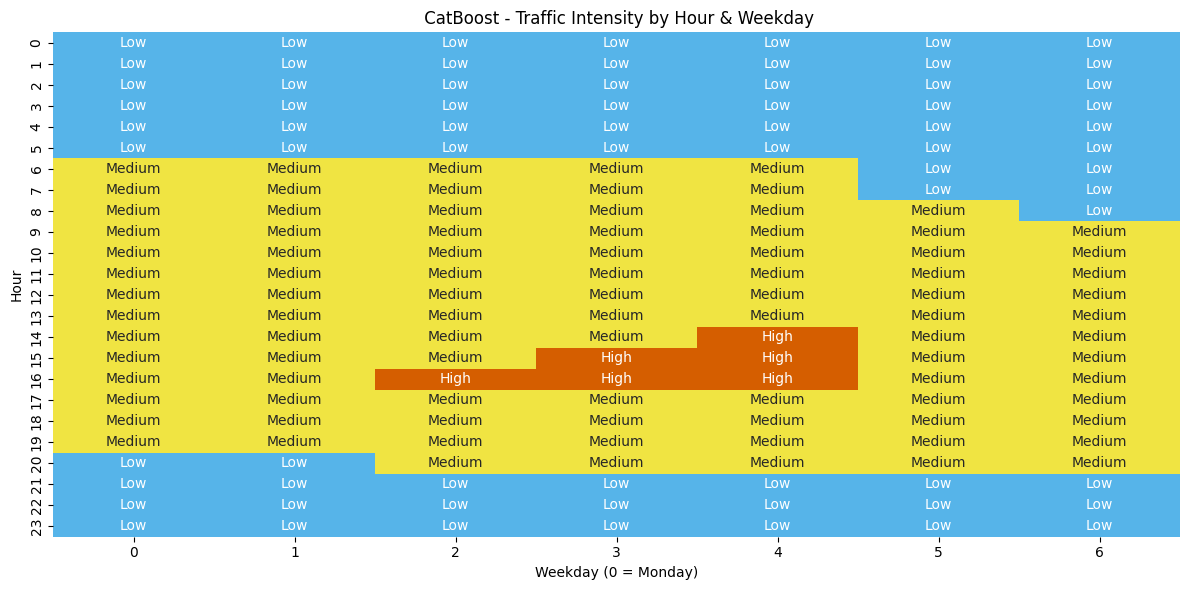

In [115]:
# STEP 15: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_numeric, cmap=cmap, annot=pivot_class, fmt='', cbar=False)
plt.title(" CatBoost - Traffic Intensity by Hour & Weekday")
plt.xlabel("Weekday (0 = Monday)")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()